Image By k = 5 Created. (Compress Ratio = 19.898% )
Image By k = 30 Created. (Compress Ratio = 8.921% )
Image By k = 55 Created. (Compress Ratio = 7.225% )
Image By k = 80 Created. (Compress Ratio = 5.624% )
Image By k = 105 Created. (Compress Ratio = 2.67% )


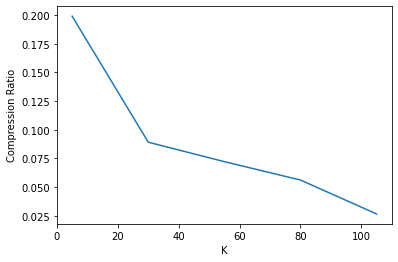

In [3]:
import numpy as np
import scipy.linalg as LA
from PIL import Image
import matplotlib.pyplot as plt


im = Image.open('data/yalefaces/subject01.noglasses') ## 5th Image
A = np.asarray(im.convert("L"))

K_ha = []
Rate_ha = []

pSize = np.sum(np.sum(A))

for r in range(5, 106, 25):
    
    U, S, Vh = LA.svd(A)

    sigma = np.zeros((243, 320))
    for p in range(len(S)) :
        sigma[p][p] = S[p]

    Sk = sigma.copy()
    for i in range(r):
        Sk[i] = 0
    Ssk = sigma - Sk
    imgarr = U @ Ssk @ Vh
    imgarr = imgarr.astype(np.uint8)
    
    CRatio = round(1 - ( (int( np.sum( np.sum(imgarr) ) ) ) / pSize),5)
    
    img = Image.fromarray(imgarr)
    img.save("SVDCompout/k"+str(r)+".gif")
    print("Image By k = "+str(r)+" Created. (Compress Ratio = "+str(CRatio * 100)+"% )")
    
    K_ha.append(r)   
    Rate_ha.append(CRatio)
plt.plot(K_ha,Rate_ha)
plt.ylabel('Compression Ratio')
plt.xlabel('K')
plt.show()